<a href="https://colab.research.google.com/github/hflautert/AnomalyDetection/blob/main/CIC23TCPSYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experimento de reconhecimento de anomalias em ataque DoS do tipo TCPSYN.

Fonte de dados:

NETO, Euclides Carlos Pinto et al. CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment. 2023.

Rede normal:
http://205.174.165.80/IOTDataset/CIC_IOT_Dataset2023/CICIOT/pcap/BenignTraffic/BenignTraffic3.pcap

Rede com ataques:
http://205.174.165.80/IOTDataset/CIC_IOT_Dataset2023/CICIOT/pcap/DDoS-SYN_Flood/DDoS-SYN_Flood7.pcap

Descrição dos ataques:
https://www.mdpi.com/1424-8220/23/13/5941

Devido ao alto número de pacotes gerados pela inundação TCPSYN, os arquivos foram segmentados em no máximo 3mi de pacotes para extração de estatísticas.
`editcap.exe DoS-SYN_Flood7.pcap DoS-SYN_Flood_s.pcap -c 3000000`

Para gerar as estatísticas, os arquivos foram abertos com WireShark, aplicado filtro `tcp.flags.syn == 1 and tcp.flags.ack == 0`. Posteriormente gerado dados no menu Statistics, I/O Graph, salvo como csv, nos intervalos de 1 minuto, 10 segundos, 1 segundo, 500ms e 100ms.

In [1]:
# Importando bibliotecas
# Manipulação de matrizes e operações matemáticas de alto nível
import numpy as np
# Geração de gráficos
import matplotlib.pyplot as plt
# Funcoes media movel
import httpimport
url = "https://gist.githubusercontent.com/hflautert/c0d5dee869cb369a912de6b8c02d457e/raw/5878dc67cac9ddfc26345a95b35c4f96ace6d57d"
with httpimport.remote_repo(url):
  import funcoesmm as fmm

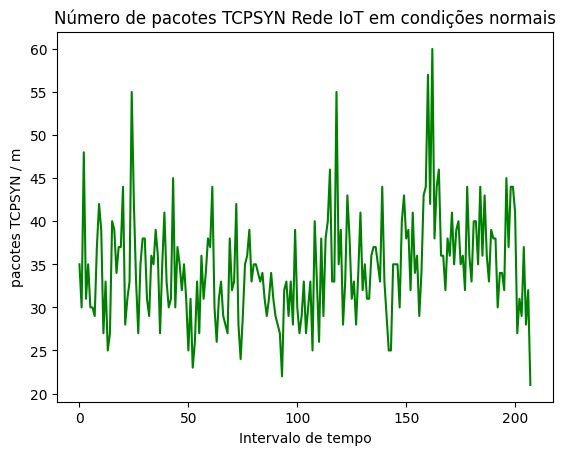

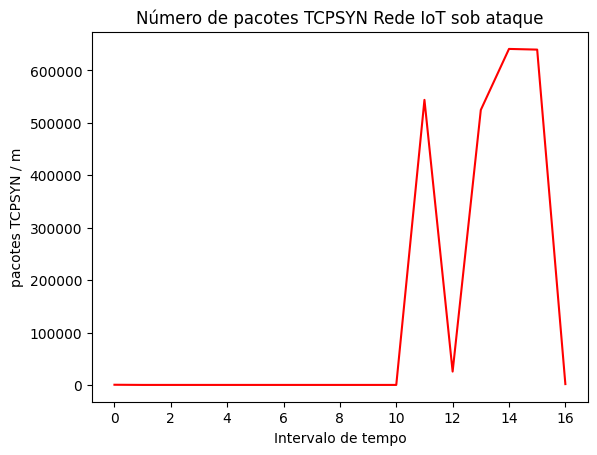

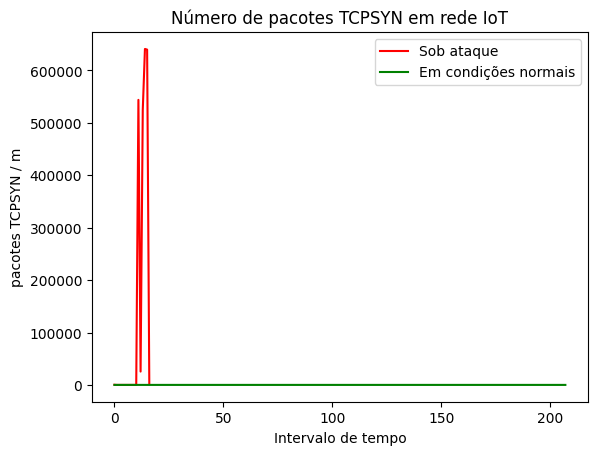

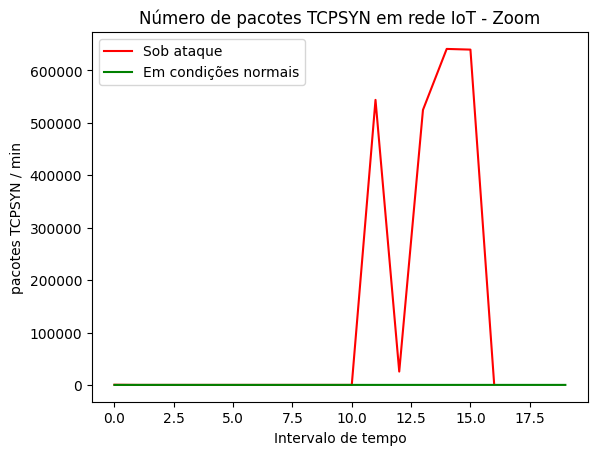

In [2]:
# Carregando dados

dados_normal_1m = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/BenignTraffic3_ws_TCPSYN_1m.csv")
dados_normal_10s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/BenignTraffic3_ws_TCPSYN_10s.csv")
dados_normal_1s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/BenignTraffic3_ws_TCPSYN_1s.csv")
dados_normal_500ms = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/BenignTraffic3_ws_TCPSYN_500ms.csv")
dados_normal_100ms = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/BenignTraffic3_ws_TCPSYN_100ms.csv")

dados_ataque_1m = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/DoS-SYN_Flood7_TCPSYN_1m.csv")
dados_ataque_10s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/DoS-SYN_Flood7_TCPSYN_10s.csv")
dados_ataque_1s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/DoS-SYN_Flood7_TCPSYN_1s.csv")
dados_ataque_500ms = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/DoS-SYN_Flood7_TCPSYN_500ms.csv")
dados_ataque_100ms = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsCIC23/DoS-SYN_Flood7_TCPSYN_100ms.csv")


tipo_dos_pacotes='TCPSYN'

fmm.visualiza(dados_normal_1m,'m','g','Rede IoT em condições normais',tipo_dos_pacotes)
fmm.visualiza(dados_ataque_1m,'m','r','Rede IoT sob ataque',tipo_dos_pacotes)
fmm.visualizamix(dados_ataque_1m,'r',dados_normal_1m,'g','m',tipo_dos_pacotes)

# Vizualização otimizada com zoom na janela de ataque de 1, 10 e 100 pcts/s
v_dados_normal_1m = dados_normal_1m[:20]
v_dados_ataque_1m = dados_ataque_1m[:]

# Unindo linhas
plt.plot(v_dados_ataque_1m, color = 'r', label = "Sob ataque")
plt.plot(v_dados_normal_1m, color = 'g', label = "Em condições normais")
plt.title('Número de pacotes '+tipo_dos_pacotes+' em rede IoT - Zoom')
plt.xlabel('Intervalo de tempo')
plt.ylabel('pacotes '+tipo_dos_pacotes+' / min')
plt.legend()
plt.show()

Total de ataques identificados: 1


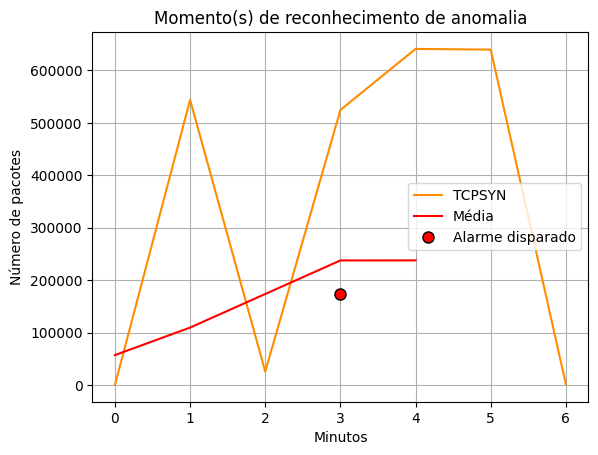

Falsos positivos: 0


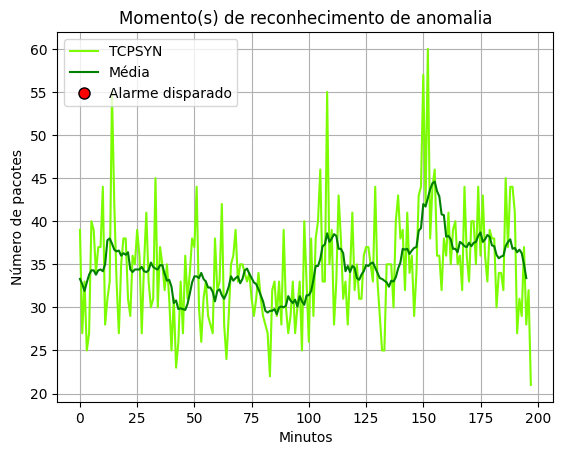

In [3]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_1m
dados_ataque=dados_ataque_1m
unidade_de_tempo='Minutos'
delta=1.10
intervalo=10
taxa_minima=0

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


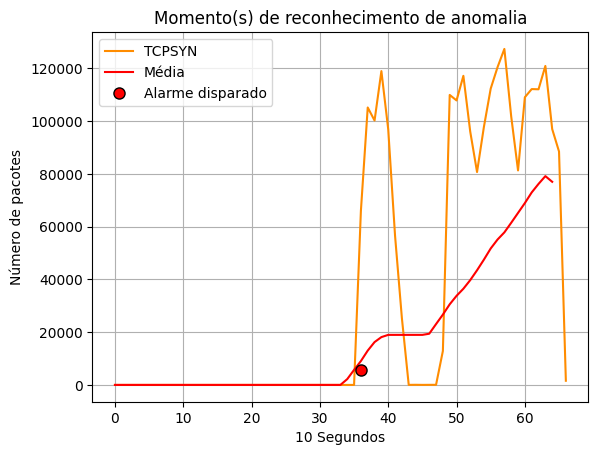

Falsos positivos: 0


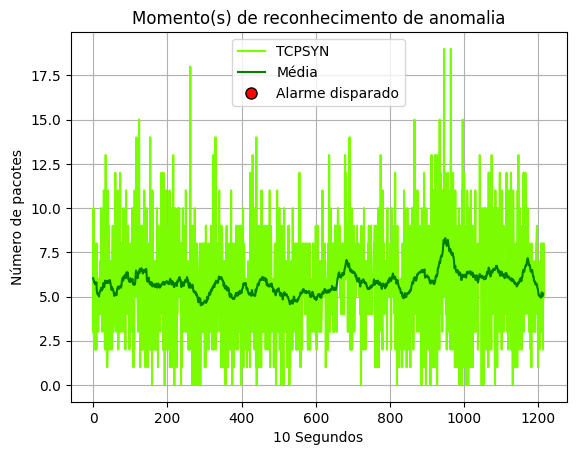

In [4]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_10s
dados_ataque=dados_ataque_10s
unidade_de_tempo='10 Segundos'
delta=1.10
intervalo=30
taxa_minima=0

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Total de ataques identificados: 1


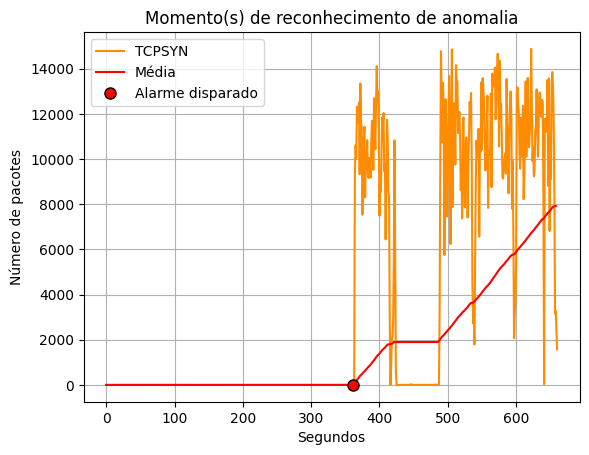

Falsos positivos: 0


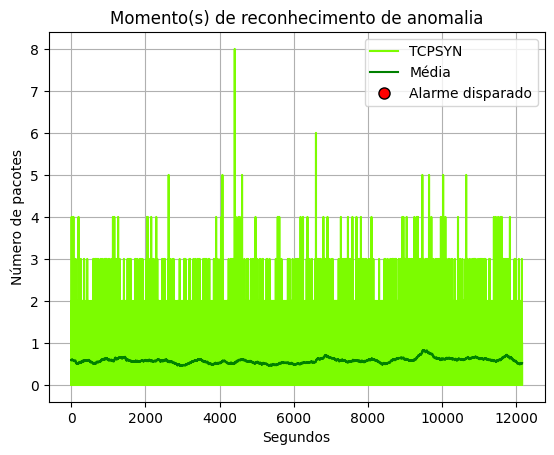

In [5]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.10
intervalo=300
taxa_minima=0

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


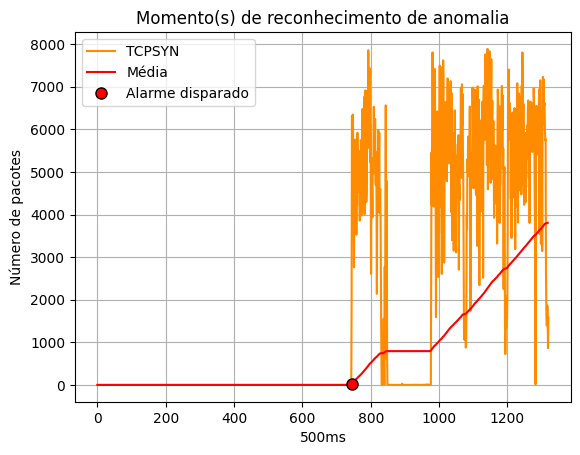

Falsos positivos: 0


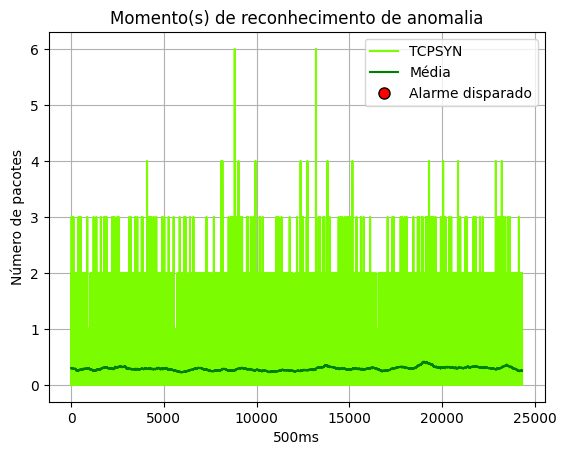

In [6]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_500ms
dados_ataque=dados_ataque_500ms
unidade_de_tempo='500ms'
delta=1.10
intervalo=600
taxa_minima=0

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


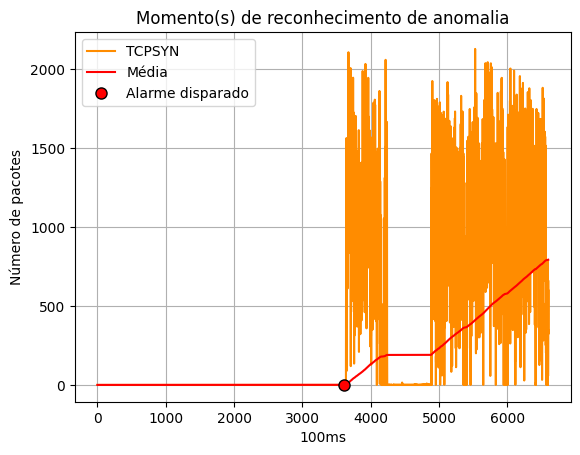

Falsos positivos: 0


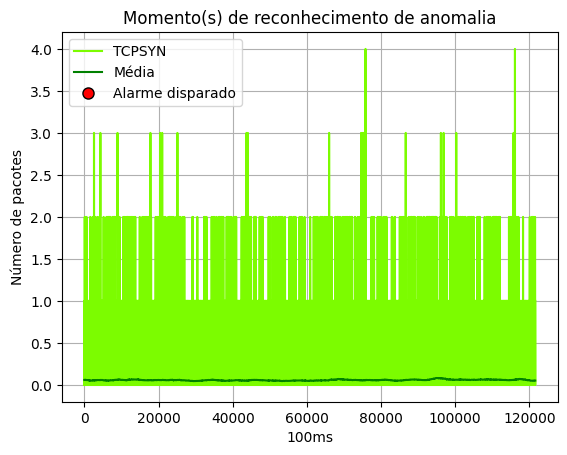

In [7]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_100ms
dados_ataque=dados_ataque_100ms
unidade_de_tempo='100ms'
delta=1.10
intervalo=3000
taxa_minima=0

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)